In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('data.csv')
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [59]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of churn status')

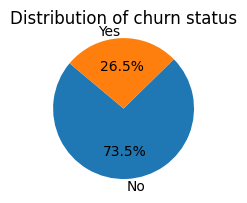

In [60]:
plt.figure(figsize=(2,2))
output_counts = data['Churn'].value_counts()
plt.pie(output_counts, labels = output_counts.index, autopct = '%1.1f%%',startangle =140)
plt.axis('equal')
plt.title('Distribution of churn status')


In [ ]:
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')


In [72]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

etaw data clean korar upay

In [75]:
cols = ['MonthlyCharges', 'TotalCharges']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


box plot for numarical feature


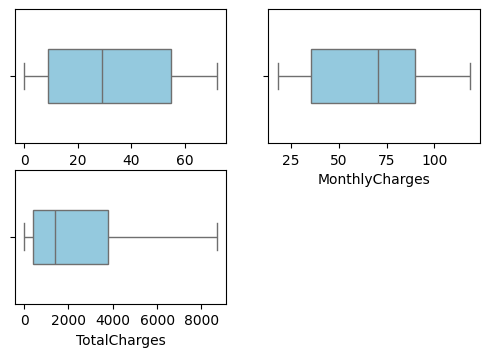

In [81]:
print('box plot for numarical feature')
plt.figure(figsize=(6,8))
numarical_feature = ['tenure','MonthlyCharges','TotalCharges']
for i, column in enumerate(numarical_feature):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=data[column],color='skyblue',width=0.4)



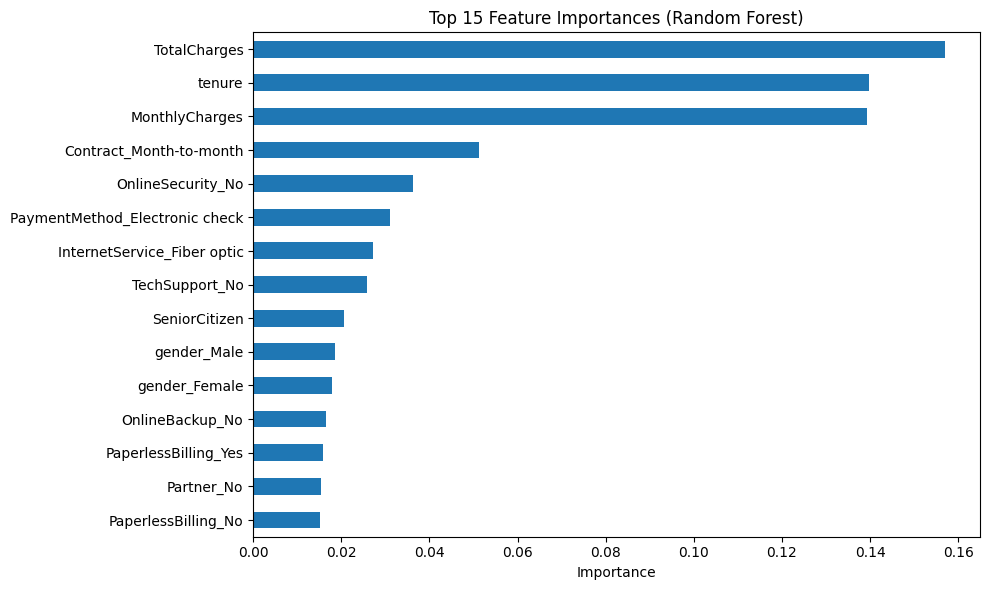

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('data.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Convert target to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Drop non-useful columns
df = df.drop(['customerID'], axis=1)

# Encode categorical features
df_encoded = pd.get_dummies(df)

# Split into X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)[:15]

# Plot
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_11088\2521840677.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tenure_group'] = pd.cut(df_clean['tenure'], bins=[0, 12, 24, 48, 60, 72],


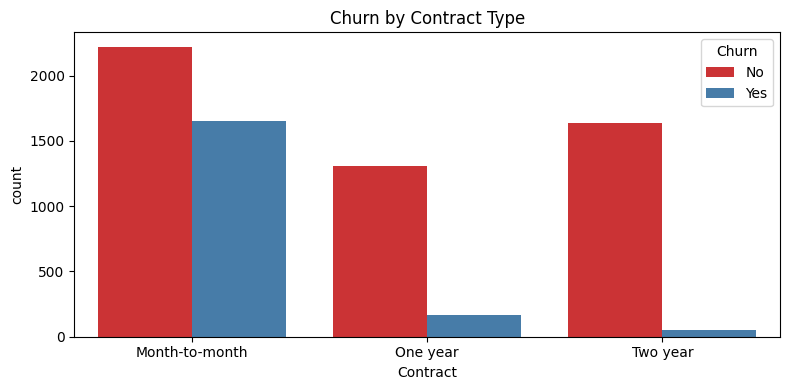

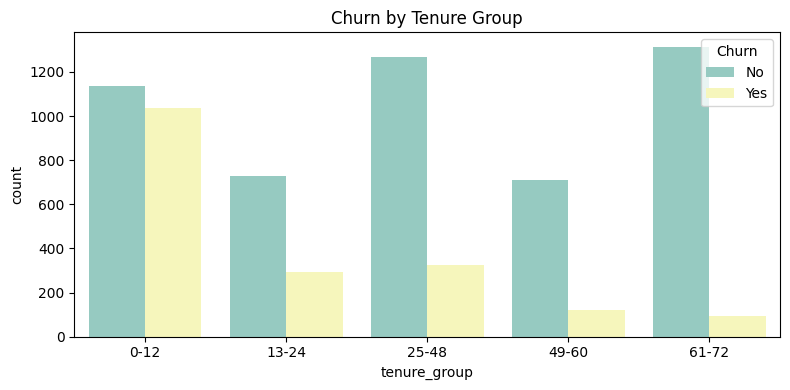

C:\Users\Asus\AppData\Local\Temp\ipykernel_11088\2521840677.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', palette='coolwarm')


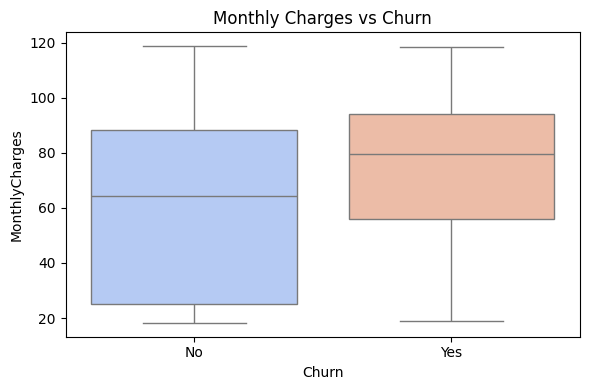

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

# Convert TotalCharges to numeric and drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna()

# Create tenure group
df_clean['tenure_group'] = pd.cut(df_clean['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                                  labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

# Plot churn by contract
plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.tight_layout()
plt.show()

# Plot churn by tenure group
plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x='tenure_group', hue='Churn', palette='Set3')
plt.title('Churn by Tenure Group')
plt.tight_layout()
plt.show()

# Monthly Charges vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.tight_layout()
plt.show()
